# Titanic - Machine Learning from Disaster parte 2
## Vamos utilizar os dados disponíveis no Kaggle: https://www.kaggle.com/competitions/titanic
## - É um dataset de competição
## - O resultado é avaliado através da acurácia

## Refazendo todo processo feito no arquivo analise_titanic2

In [2]:
# Importando o pandas
import pandas as pd

# Visualizando a base de treino
treino = pd.read_csv('train.csv')
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# Visualizando a base de teste
teste = pd.read_csv('test.csv')
teste.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### Refazendo os tratamentos 

In [4]:
# Eliminando alta cardinalidade
treino = treino.drop(['Name','Ticket','Cabin'],axis=1)
teste = teste.drop(['Name','Ticket','Cabin'],axis=1)

# Tratando média para substituir valores nulos de idade
treino.loc[treino.Age.isnull(),'Age'] = treino.Age.mean()
teste.loc[teste.Age.isnull(),'Age'] = teste.Age.mean()

# Tratando a coluna Embarked da base de treino usando a moda 
treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

# Tratando a coluna Fare da base de teste usando a média
teste.loc[teste.Fare.isnull(),'Fare'] = teste.Fare.mean()

# Tratando a coluna "Sex" com lambda function
treino['MaleCheck'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)
teste['MaleCheck'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)
treino

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck
0,1,0,3,male,22.000000,1,0,7.2500,S,1
1,2,1,1,female,38.000000,1,0,71.2833,C,0
2,3,1,3,female,26.000000,0,0,7.9250,S,0
3,4,1,1,female,35.000000,1,0,53.1000,S,0
4,5,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S,1
887,888,1,1,female,19.000000,0,0,30.0000,S,0
888,889,0,3,female,29.699118,1,2,23.4500,S,0
889,890,1,1,male,26.000000,0,0,30.0000,C,1


In [5]:
teste

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck
0,892,3,male,34.50000,0,0,7.8292,Q,1
1,893,3,female,47.00000,1,0,7.0000,S,0
2,894,2,male,62.00000,0,0,9.6875,Q,1
3,895,3,male,27.00000,0,0,8.6625,S,1
4,896,3,female,22.00000,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S,1
414,1306,1,female,39.00000,0,0,108.9000,C,0
415,1307,3,male,38.50000,0,0,7.2500,S,1
416,1308,3,male,30.27259,0,0,8.0500,S,1


In [6]:
# Utilizando OnHotEnconder e fazendo o fit com os dados
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')
ohe = ohe.fit(treino[['Embarked']])

# Atualizando a base de treino 
ohe_df = pd.DataFrame(ohe.transform(treino[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())
treino = pd.concat([treino,ohe_df],axis=1)

# Base de teste
ohe_df = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())
teste = pd.concat([teste,ohe_df],axis=1)

# Apagando colunas já tratadas
treino = treino.drop(['Sex','Embarked'],axis=1)
teste = teste.drop(['Sex','Embarked'],axis=1)
treino

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,1,0,0


In [7]:
teste

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,1,0,1,0
1,893,3,47.00000,1,0,7.0000,0,0,0,1
2,894,2,62.00000,0,0,9.6875,1,0,1,0
3,895,3,27.00000,0,0,8.6625,1,0,0,1
4,896,3,22.00000,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1,0,0,1
414,1306,1,39.00000,0,0,108.9000,0,1,0,0
415,1307,3,38.50000,0,0,7.2500,1,0,0,1
416,1308,3,30.27259,0,0,8.0500,1,0,0,1


## Analisando os dados

### Ananlisando Outliers

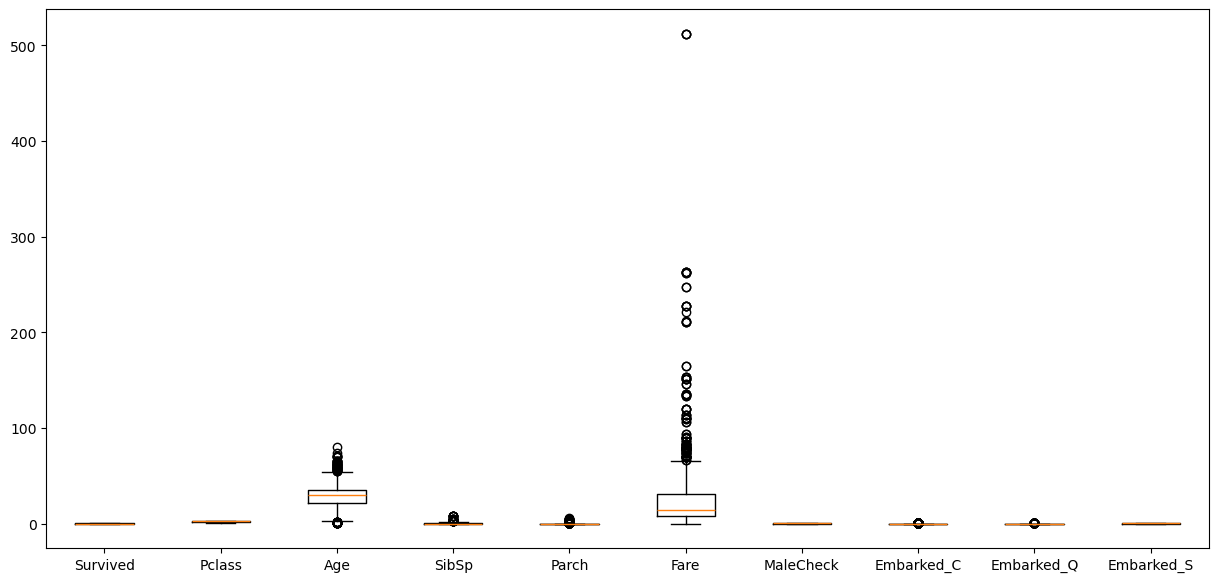

In [15]:
# Visualização da escala dos dados
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))

ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1),treino.iloc[:,1:11].columns)
plt.show()

- outliers detectados em 'Fare' e 'Age'

In [16]:
# Importando o RobustScaler
from sklearn.preprocessing import RobustScaler

# Criando o scaler
transformer = RobustScaler().fit(treino[['Age','Fare']])

# Transformando os dados
treino[['Age', 'Fare']] = transformer.transform(treino[['Age','Fare']])
treino

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,-0.592240,1,0,-0.312011,1,0,0,1
1,2,1,1,0.638529,1,0,2.461242,0,1,0,0
2,3,1,3,-0.284548,0,0,-0.282777,0,0,0,1
3,4,1,1,0.407760,1,0,1.673732,0,0,0,1
4,5,0,3,0.407760,0,0,-0.277363,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207624,0,0,-0.062981,1,0,0,1
887,888,1,1,-0.823009,0,0,0.673281,0,0,0,1
888,889,0,3,0.000000,1,2,0.389604,0,0,0,1
889,890,1,1,-0.284548,0,0,0.673281,1,1,0,0


In [17]:
# Base teste
# Criando o scaler
transformer = RobustScaler().fit(teste[['Age','Fare']])

# Transformando os dados
teste[['Age', 'Fare']] = transformer.transform(teste[['Age','Fare']])
teste

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0.331562,0,0,-0.280670,1,0,1,0
1,893,3,1.311954,1,0,-0.315800,0,0,0,1
2,894,2,2.488424,0,0,-0.201943,1,0,1,0
3,895,3,-0.256674,0,0,-0.245367,1,0,0,1
4,896,3,-0.648831,1,1,-0.091793,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.000000,0,0,-0.271316,1,0,0,1
414,1306,1,0.684503,0,0,4.001229,0,1,0,0
415,1307,3,0.645287,0,0,-0.305208,1,0,0,1
416,1308,3,0.000000,0,0,-0.271316,1,0,0,1


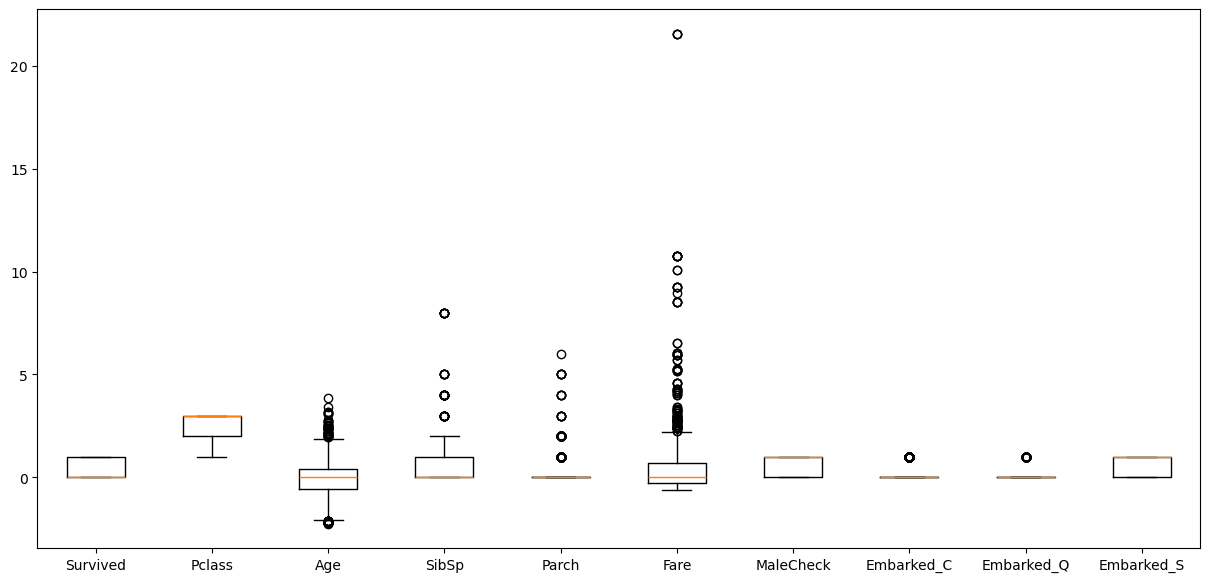

In [18]:
# Visualização nova
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))

ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1),treino.iloc[:,1:11].columns)
plt.show()

### Analisando as colunas SibSp e Parch

- SibSp = Nº de irmãos/conjuges a bordo
- Parch = Nº de pais/filhos a bordo

In [22]:
# Sobrevivencia para SibSp
SibSp_df =  treino.groupby('SibSp')['Survived'].agg(['sum', 'count', 'mean']).reset_index()
SibSp_df.columns = ['SibSp', 'sobreviventes', 'total', 'taxa_sobrevivencia']
SibSp_df 

,SibSp,sobreviventes,total,taxa_sobrevivencia
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


In [23]:
# Sobrevivencia para Parch
Parch_df =  treino.groupby('Parch')['Survived'].agg(['sum', 'count', 'mean']).reset_index()
Parch_df.columns = ['Parch', 'sobreviventes', 'total', 'taxa_sobrevivencia']
Parch_df 

,Parch,sobreviventes,total,taxa_sobrevivencia
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


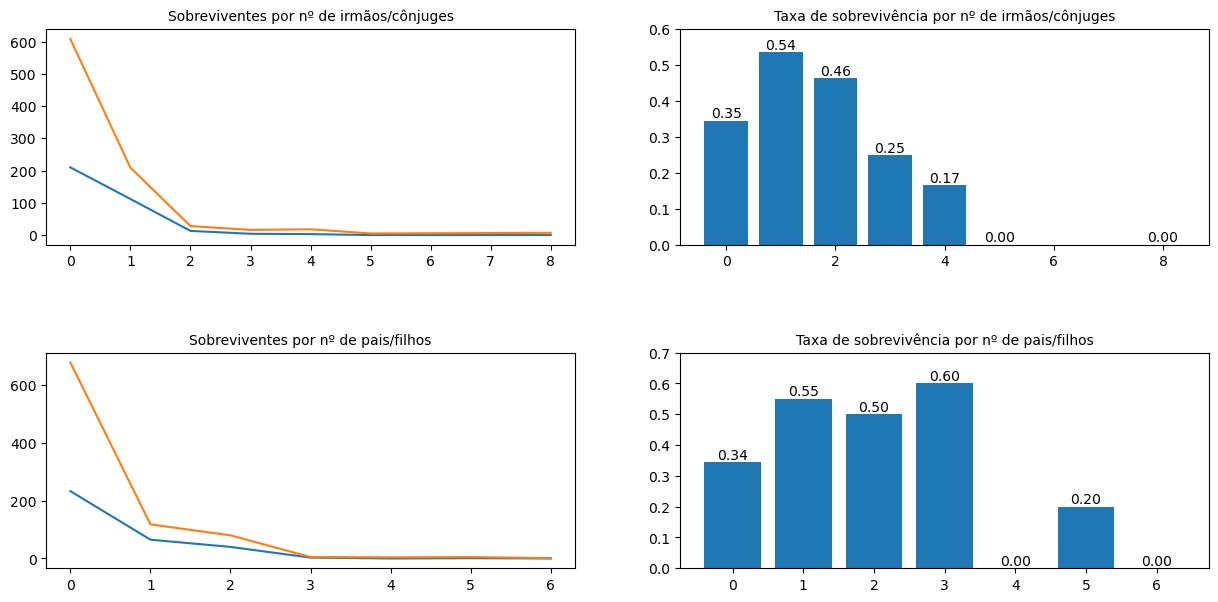

In [25]:
# Visualização gráfica
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(15,7))

ax[0,0].plot(SibSp_df.SibSp, SibSp_df.sobreviventes)
ax[0,0].plot(SibSp_df.SibSp, SibSp_df.total)
ax[0,0].set_title('Sobreviventes por nº de irmãos/cônjuges', fontsize=10)

labels1 = ax[0,1].bar(SibSp_df.SibSp, SibSp_df.taxa_sobrevivencia)
ax[0,1].bar_label(labels1,fmt="%.02f")
ax[0,1].set(ylim=(0,0.6))
ax[0,1].set_title('Taxa de sobrevivência por nº de irmãos/cônjuges', fontsize=10)

ax[1,0].plot(Parch_df.Parch, Parch_df.sobreviventes)
ax[1,0].plot(Parch_df.Parch, Parch_df.total)
ax[1,0].set_title('Sobreviventes por nº de pais/filhos', fontsize=10)

labels2 = ax[1,1].bar(Parch_df.Parch, Parch_df.taxa_sobrevivencia)
ax[1,1].bar_label(labels2,fmt="%.02f")
ax[1,1].set(ylim=(0,0.7))
ax[1,1].set_title('Taxa de sobrevivência por nº de pais/filhos', fontsize=10)

plt.subplots_adjust(hspace=0.5)
plt.show()

- Passageiros que viajaram sozinhos tiveram menor taxa de sobrevivência

### Criação Coluna 'Alone' 

In [28]:
def alone(x, y):
    if (x == 0 and y == 0):
        return 1
    else:
        return 0

In [31]:
# Aplicando na base de treinos
treino['Alone'] = treino.apply(lambda x: alone(x.SibSp, x.Parch), axis=1)

# Verificação
treino

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Alone
0,1,0,3,-0.592240,1,0,-0.312011,1,0,0,1,0
1,2,1,1,0.638529,1,0,2.461242,0,1,0,0,0
2,3,1,3,-0.284548,0,0,-0.282777,0,0,0,1,1
3,4,1,1,0.407760,1,0,1.673732,0,0,0,1,0
4,5,0,3,0.407760,0,0,-0.277363,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207624,0,0,-0.062981,1,0,0,1,1
887,888,1,1,-0.823009,0,0,0.673281,0,0,0,1,1
888,889,0,3,0.000000,1,2,0.389604,0,0,0,1,0
889,890,1,1,-0.284548,0,0,0.673281,1,1,0,0,1


In [32]:
# Aplicando na base de teste
teste['Alone'] = teste.apply(lambda x: alone(x.SibSp, x.Parch), axis=1)

# Verificação
teste

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Alone
0,892,3,0.331562,0,0,-0.280670,1,0,1,0,1
1,893,3,1.311954,1,0,-0.315800,0,0,0,1,0
2,894,2,2.488424,0,0,-0.201943,1,0,1,0,1
3,895,3,-0.256674,0,0,-0.245367,1,0,0,1,1
4,896,3,-0.648831,1,1,-0.091793,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.000000,0,0,-0.271316,1,0,0,1,1
414,1306,1,0.684503,0,0,4.001229,0,1,0,0,1
415,1307,3,0.645287,0,0,-0.305208,1,0,0,1,1
416,1308,3,0.000000,0,0,-0.271316,1,0,0,1,1


### Criação da coluna 'Fam_membs' = Family members

In [33]:
# Criação na base de treino
treino['Fam_memb'] = treino.SibSp + treino.Parch

#Verificação
treino

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Alone,Fam_memb
0,1,0,3,-0.592240,1,0,-0.312011,1,0,0,1,0,1
1,2,1,1,0.638529,1,0,2.461242,0,1,0,0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0,0,1,1,0
3,4,1,1,0.407760,1,0,1.673732,0,0,0,1,0,1
4,5,0,3,0.407760,0,0,-0.277363,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207624,0,0,-0.062981,1,0,0,1,1,0
887,888,1,1,-0.823009,0,0,0.673281,0,0,0,1,1,0
888,889,0,3,0.000000,1,2,0.389604,0,0,0,1,0,3
889,890,1,1,-0.284548,0,0,0.673281,1,1,0,0,1,0


In [34]:
# Criação na base de teste
teste['Fam_memb'] = teste.SibSp + teste.Parch

#Verificação
teste

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Alone,Fam_memb
0,892,3,0.331562,0,0,-0.280670,1,0,1,0,1,0
1,893,3,1.311954,1,0,-0.315800,0,0,0,1,0,1
2,894,2,2.488424,0,0,-0.201943,1,0,1,0,1,0
3,895,3,-0.256674,0,0,-0.245367,1,0,0,1,1,0
4,896,3,-0.648831,1,1,-0.091793,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.000000,0,0,-0.271316,1,0,0,1,1,0
414,1306,1,0.684503,0,0,4.001229,0,1,0,0,1,0
415,1307,3,0.645287,0,0,-0.305208,1,0,0,1,1,0
416,1308,3,0.000000,0,0,-0.271316,1,0,0,1,1,0


In [36]:
# Verificando Sobrevivência por familiar
Fam_memb_df = treino.groupby('Fam_memb')['Survived'].agg(['sum', 'count', 'mean']).reset_index()
Fam_memb_df.columns = ['Fam_memb', 'sobreviventes', 'total', 'taxa_sobrevivencia']
Fam_memb_df 

,Fam_memb,sobreviventes,total,taxa_sobrevivencia
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


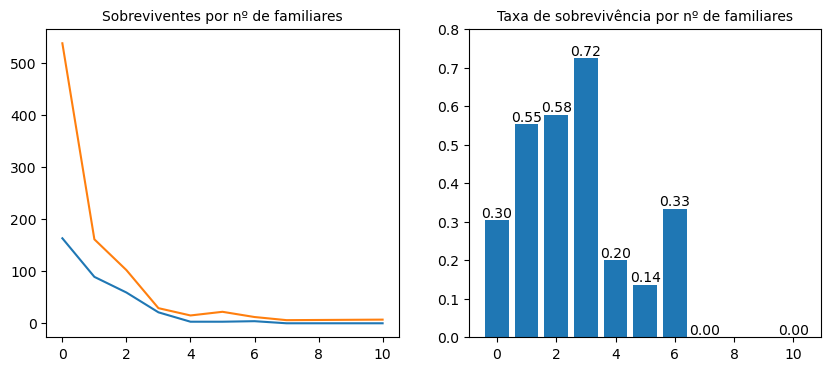

In [41]:
# Visualização gráfica
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

ax[0].plot(Fam_memb_df.Fam_memb, Fam_memb_df.sobreviventes)
ax[0].plot(Fam_memb_df.Fam_memb, Fam_memb_df.total)
ax[0].set_title('Sobreviventes por nº de familiares', fontsize=10)

labels1 = ax[1].bar(Fam_memb_df.Fam_memb, Fam_memb_df.taxa_sobrevivencia)
ax[1].bar_label(labels1,fmt="%.02f")
ax[1].set(ylim=(0,0.8))
ax[1].set_title('Taxa de sobrevivência por nº de familiares', fontsize=10)

plt.show()